In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
len(df.columns)

7

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We have four numeric columns to work with

In [6]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages 


charges     0.0
region      0.0
smoker      0.0
children    0.0
bmi         0.0
sex         0.0
age         0.0
dtype: float64

There are no missing values in this data set.

## Description the Columns

1. Age : Age of the individual being tesed.

2. Sex : The gender of the person

3. BMI : BMI is short for body mass index. The body mass index is a way to tell how much body fat a person may have depending on their height and weight. The higher the number means the individual has more body fat. 

4. Children : This column is alluding to if the individual who is being tested has children or not.

5. Smoker : If the person smokes or not. 

6. Region : Which region of the United States is the person who is being tested from.

7. Charges : How much the the person is paying for their medical expenses

## Exploratory Analysis

## Questions to Anwser

1. How do medical expenses change based on age?
2. Which gender had the highest medical expenses?
3. Is being a smoker correlated to medical expenses being higher?
4. Does having a higher BMI correlated to higher medical charges?
5. Does having children have any effect on either man or women on medical charges?
6. How does being in a certain region affect medical charges?

In [7]:
data = df


bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['agerange'] = pd.cut(df['age'], bins, labels = labels,include_lowest = True)

print(df)

      age     sex     bmi  children smoker     region      charges agerange
0      19  female  27.900         0    yes  southwest  16884.92400    18-30
1      18    male  33.770         1     no  southeast   1725.55230    18-30
2      28    male  33.000         3     no  southeast   4449.46200    18-30
3      33    male  22.705         0     no  northwest  21984.47061    31-40
4      32    male  28.880         0     no  northwest   3866.85520    31-40
...   ...     ...     ...       ...    ...        ...          ...      ...
1333   50    male  30.970         3     no  northwest  10600.54830    41-50
1334   18  female  31.920         0     no  northeast   2205.98080    18-30
1335   18  female  36.850         0     no  southeast   1629.83350    18-30
1336   21  female  25.800         0     no  southwest   2007.94500    18-30
1337   61  female  29.070         0    yes  northwest  29141.36030    61-70

[1338 rows x 8 columns]


In [8]:
df

,age,sex,bmi,children,smoker,region,charges,agerange
0,19,female,27.900,0,yes,southwest,16884.92400,18-30
1,18,male,33.770,1,no,southeast,1725.55230,18-30
2,28,male,33.000,3,no,southeast,4449.46200,18-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50
1334,18,female,31.920,0,no,northeast,2205.98080,18-30
1335,18,female,36.850,0,no,southeast,1629.83350,18-30
1336,21,female,25.800,0,no,southwest,2007.94500,18-30


In [9]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,agerange
1333,50,male,30.97,3,no,northwest,10600.5483,41-50
1334,18,female,31.92,0,no,northeast,2205.9808,18-30
1335,18,female,36.85,0,no,southeast,1629.8335,18-30
1336,21,female,25.80,0,no,southwest,2007.9450,18-30
1337,61,female,29.07,0,yes,northwest,29141.3603,61-70


In [10]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,agerange
0,19,female,27.900,0,yes,southwest,16884.92400,18-30
1,18,male,33.770,1,no,southeast,1725.55230,18-30
2,28,male,33.000,3,no,southeast,4449.46200,18-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
5,31,female,25.740,0,no,southeast,3756.62160,31-40
6,46,female,33.440,1,no,southeast,8240.58960,41-50
7,37,female,27.740,3,no,northwest,7281.50560,31-40
8,37,male,29.830,2,no,northeast,6406.41070,31-40
9,60,female,25.840,0,no,northwest,28923.13692,51-60


In [11]:

df1 = df[['age','agerange','charges']]

In [12]:
df1

,age,agerange,charges
0,19,18-30,16884.92400
1,18,18-30,1725.55230
2,28,18-30,4449.46200
3,33,31-40,21984.47061
4,32,31-40,3866.85520
...,...,...,...
1333,50,41-50,10600.54830
1334,18,18-30,2205.98080
1335,18,18-30,1629.83350
1336,21,18-30,2007.94500


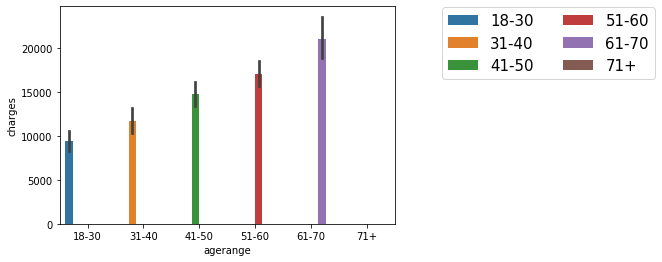

In [13]:
ax = sns.barplot(x="agerange", y="charges", hue="agerange", data=df)
plt.legend(loc="upper right", bbox_to_anchor=(1.8, 1.03), ncol=2, fontsize = 15)

As expected as the data gets to the older population the carhges for their medical bill is more. This data does not include any body 71 or older.

In [14]:
male = [df['sex']=='male']

In [15]:
female = [df['sex']=='female']

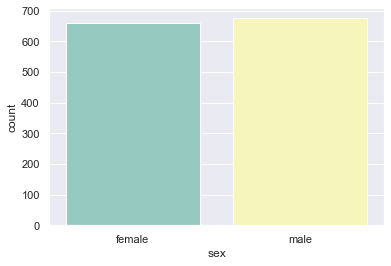

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sex", data=df, palette="Set3")

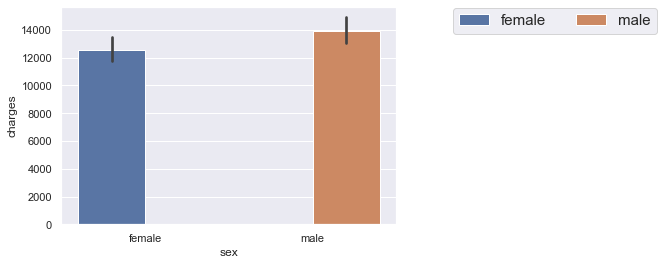

In [17]:
ax = sns.barplot(x="sex", y="charges", hue="sex", data=df)
plt.legend(loc="upper right", bbox_to_anchor=(1.8, 1.03), ncol=2, fontsize = 15)

There are slightly more males in this data set than female but the disparity between medical bills is about a difference of $1500. 

## States in each Region
Southwest : Arkansas, Colorado, Louisiana, Montana, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Utah and Wyoming.

Southeast : Alabama, Florida, Georgia, Kentucky, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia and West Virginia.

Northwest : Oregon and Washington and part of Idaho.

Northeast : Connecticut, Delaware, District of Columbia, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, pennsylvania, puerto Rico, Rhode Island, Vermont, Virgin Islands, Virginia and West Virginia.

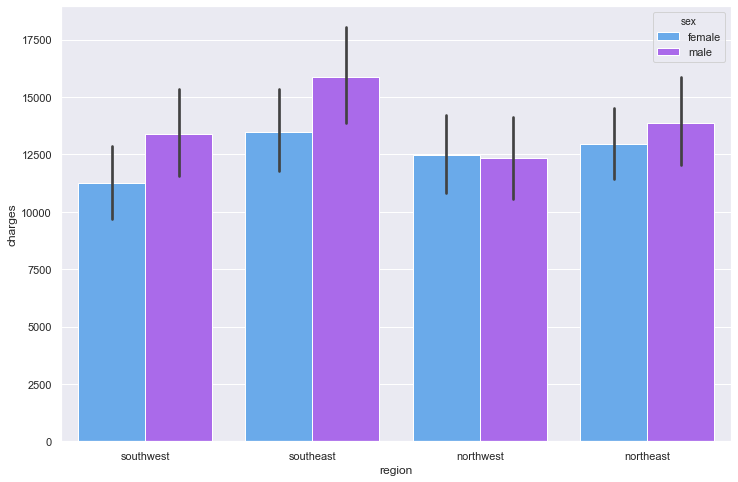

In [18]:
ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

Based on region, males had higher medical charges than the females. Besides teh northwest region. The northwest numbers can be taken witha  grain of salt because the northwest only has two states and only a part of Idaho while the other regions have atleast 10 states in them. 

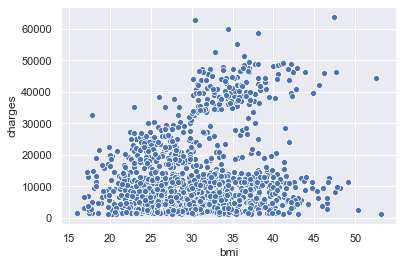

In [19]:
sns.scatterplot(x="bmi", y="charges", data=df);

BMI : BMI is an inexpensive and easy screening method for weight category—underweight, healthy weight, overweight, and obesity.  If your BMI is 18.5 to <25, it falls within the healthy weight range. If your BMI is 25.0 to <30, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obesity range

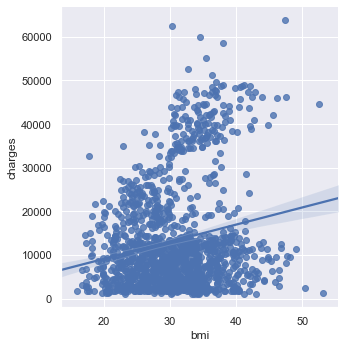

In [20]:
sns.lmplot(x="bmi", y="charges", data=df);

There is a correlation between higher bmi and charges. As we can see the line of best fit is showing us an upward trend in charges as BMI goes up. This makes sense because a higher BMI can be correlated to having more weight and being considered more obease and that can lead to more helath issues. 

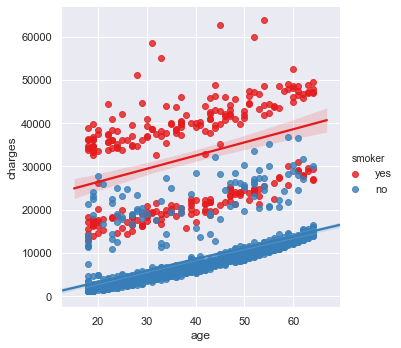

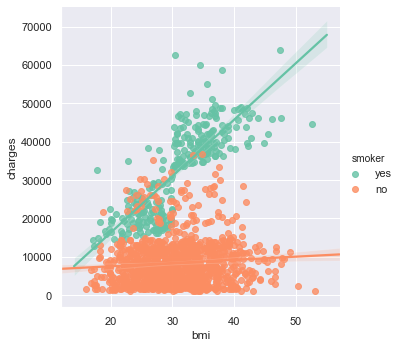

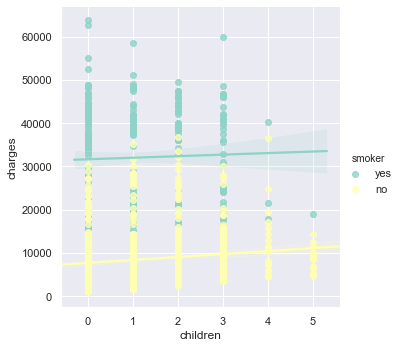

In [21]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

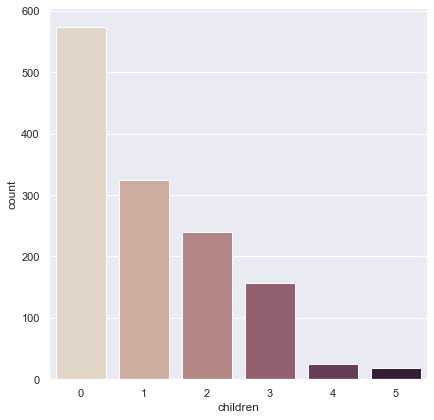

In [22]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df, size = 6)

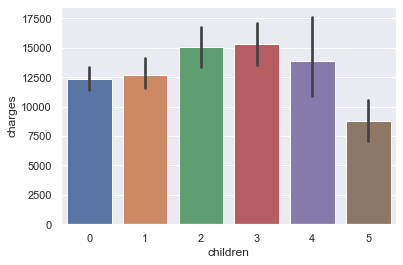

In [23]:
ax = sns.barplot(x = 'children', y = 'charges', data = df)

on average individuals with three children have higher medical charges in this data. This data does not have a equal amount of children for each amount so the data can be skewed because of that. This makes it even more impressive knowing that individuals with three childrens having higher medical charges than the inviduals with 0 or 1 children even though in this individuals with 0 or 1 children are a lot more. 

In [24]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
agerange    category
dtype: object

In [25]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age            int64
sex            int32
bmi          float64
children       int64
smoker         int32
region         int32
charges      float64
agerange    category
dtype: object

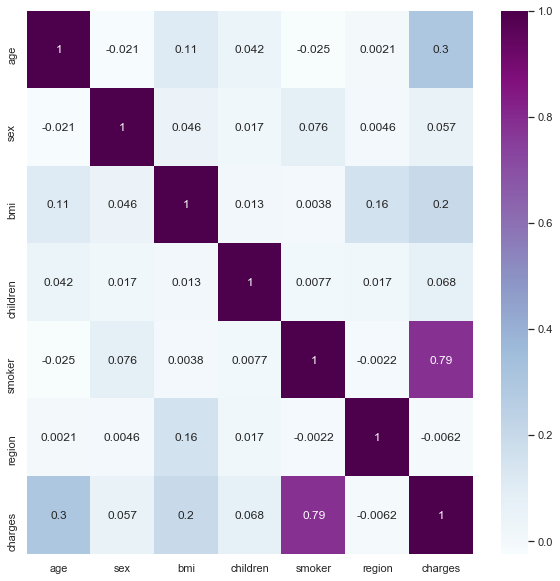

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='BuPu')

This heatmap shows a general overview of all the variables. There is no siginficant correlations with medical charges besides smoking. 

## Anwser Questions

## 1. How do medical expenses change based on age?
As expected, medical charges went up as age went up. There was a positive correlation between those two variables.

## 2. Which gender had the highest medical expenses?
Males had higher medical charges then women in this dataset. There are slight more males in this set than women so that can play a factor as to why the charges came up as more. 

## 3. Is being a smoker correlated to medical expenses being higher?
Being a smoker is correlated with having higher medical charges. Being a smoker with high BMI gives exceptionally higher medical charges than idividuals who are not smokers witha low BMI.

## 4. Does having a higher BMI correlated to higher medical charges?
The scatter plot shows an upward trend between BMI and charges. As BMI gets higher so do charges. This makes sense because having a higher BMI implies being more unhealthy and that can correlate to more health issues. 

## 5. Does having children have any effect on either man or women on medical charges?
The interesting part about this data is that there are more individuals with zero kids than individuals with children but this data still shows that individuals with children have higher medical charges. Specifically individuals with three children showed to have more medical charges. 

## 6. How does being in a certain region affect medical charges?
The region is not really relevant in determining if an individual has more medical charges. The graph that stands out the most is the bar graph for southeast. It shows males having a decent amount of medical charges over women but for the rest of the data is pretty close in comparison with medical charges with males and females. 


## Summary
After completing this analysis we are able to see what factors effect an individuals medical charges. According to this analysis we are able to see that there are three major factors that affect medical charges. We are able to see that BMI, being a smoker, an individuals age, and having children all effect medical chargers the most. Gender wasn't a fair factor to look at because this data had more males than females. I think an interesting follow up analysis would be as to see how having children effects a person's health and ultimately effecting their medical charges. As afformentioned, the dataset had more individuals with zero kids but yet the people with children still added up to higher medical charges even though that is the minority in the dataset.